<a href="https://colab.research.google.com/github/Samata1695/Random-forest-3/blob/main/RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [30]:
iris_data = load_iris()

In [31]:
dir(iris_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [32]:
iris_data.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [33]:
iris_data.target[:5]

array([0, 0, 0, 0, 0])

In [34]:
iris_data.target_names[:5]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
data = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


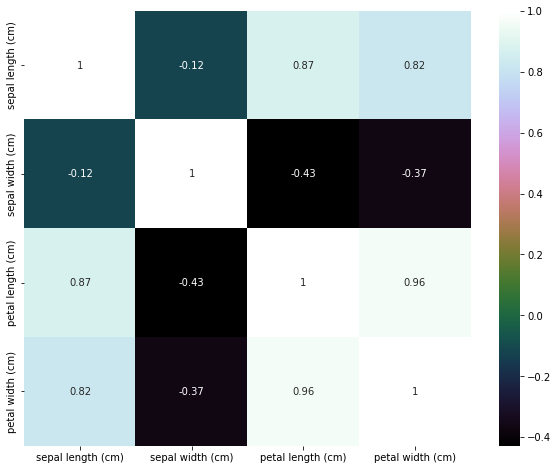

In [36]:
corr_matrix = data.corr() 
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'cubehelix')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state = 1)
len(X_train)

120

In [38]:
len(X_test)

30

In [39]:
model = RandomForestClassifier(n_estimators = 3)

In [40]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3)

In [41]:
model.score(X_test, y_test)

0.9666666666666667

In [42]:
predicted = model.predict(X_test)

Text(69.0, 0.5, 'Truth')

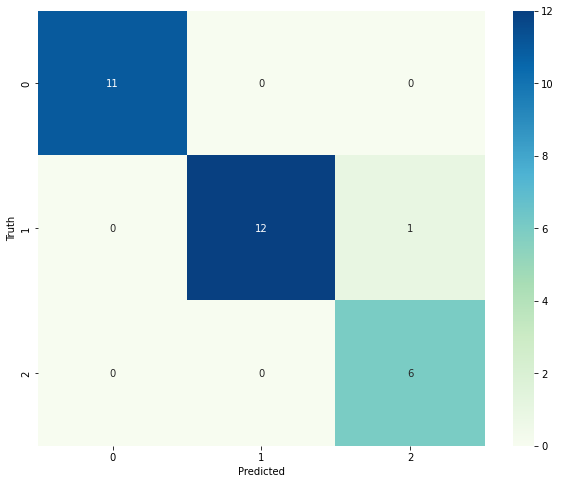

In [43]:
cm = confusion_matrix(y_test , predicted)
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, cmap = 'GnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
y_prob = model.predict_proba(X_test)
print("CLASSIFICATION REPORT CHART FOR RANDOM FOREST CLASSIFIER: ","\n\n",classification_report(y_test, predicted),"\n")

CLASSIFICATION REPORT CHART FOR RANDOM FOREST CLASSIFIER:  

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30
 



In [45]:
preds=iris_data.target_names[model.predict(X_test)]

preds[0:10]

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica'],
      dtype='<U10')